In [4]:
import glob
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [98]:
# --- FUNCTION to preprocess .txt files for consistent delimiters


def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path) as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r"\s+", line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r"\s+", line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [118]:
# --- read in flux data from all runs
# flux data are colum integrated fluxes with all timesteps in a single file


# where results are stored
results_path = {
    "ctrl": "ERW24_3-3-CTRLv2_site8",
    "maxpsd": "ERW24_3-3-HiPSDv1_site8",
    "minpsd": "ERW24_3-3-MINPSD_site8",
    "colddry": "ERW24_3-3-ColdDryv1_site8",
    "warmwet": "ERW24_3-3-WarmWetv1_site8",
    "minapp": "ERW24_3-3-LowAppRatev1_site8",
    "app90": "ERW24_3-3-App90p_site8",
}

# define file name pattern
# fn_pref = ["int_flx_co2sp", "flx_co2sp" "int_flx_gas", "flx_gas"]   # will read in all species unless fn_varInclude is defined
fn_pref = [
    "int_flx_gas",
    "flx_gas",
]  # will read in all species unless fn_varInclude is defined
fn_varInclude = []
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"

# loop through runs
df = pd.DataFrame()  # initialize empty df to store dat
for key, run in results_path.items():
    # get these paths
    flx_path, prof_path = os.path.join(run, "flx"), os.path.join(run, "prof")

    # loop through variables
    for fset in fn_pref:
        # set pattern
        fn_pattern = f"{fset}-*{fn_ext}"
        # get list of filenames
        file_paths = glob.glob(f"{flx_path}/{fn_pattern}")

        # read in data and concatenate
        for file_path in file_paths:
            # get the variable
            varpattern = re.escape(fset) + r"-(.*?).txt"
            varmatch = re.search(varpattern, file_path)
            var = varmatch.group(1)
            # skip this step if it's not in the include arr
            if varCheck:
                if var not in fn_varInclude:
                    continue
            # read in
            dfi = preprocess_txt(file_path)
            # apply pd.to_numeric to all columns using the "map" method
            dfi = dfi.map(pd.to_numeric)
            # add set, var, and key
            dfi["set"] = fset
            dfi["var"] = var
            dfi["run_id"] = key
            # combine
            df = pd.concat([df, dfi], ignore_index=True)

# sort by time and depth
df = df.sort_values(by=["var", "time"])
df

,time,tflx,adv,dif,rain,amsi,cc,dlm,tm,ka,...,g2,fo,an,fa,gt,fe2o2,res,set,var,run_id
64,0.000111,-0.306142,0.518383,72.116695,0.0,0.0,-0.034315,-0.002826,0.0,0.0,...,-72.291795,0.0,0.0,0.0,0.0,0.000000e+00,-4.007652e-13,int_flx_gas,pco2,ctrl
192,0.000111,-0.290447,0.518516,72.103840,0.0,0.0,-0.037188,-0.002830,0.0,0.0,...,-72.291890,0.0,0.0,0.0,0.0,0.000000e+00,8.236645e-15,flx_gas,pco2,ctrl
318,0.000111,-0.351975,0.518244,72.127563,0.0,0.0,-0.001896,-0.000141,0.0,0.0,...,-72.291795,0.0,0.0,0.0,0.0,0.000000e+00,-5.932631e-13,int_flx_gas,pco2,maxpsd
442,0.000111,-0.340090,0.518362,72.115818,0.0,0.0,-0.002059,-0.000142,0.0,0.0,...,-72.291890,0.0,0.0,0.0,0.0,0.000000e+00,-8.591603e-14,flx_gas,pco2,maxpsd
819,0.000111,0.454636,0.110694,71.746851,0.0,0.0,-0.020418,-0.001511,0.0,0.0,...,-72.290252,0.0,0.0,0.0,0.0,0.000000e+00,-5.264113e-13,int_flx_gas,pco2,colddry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12.008875,-0.000055,-0.003266,-72.267300,0.0,0.0,0.000000,0.000000,0.0,0.0,...,72.270622,0.0,0.0,0.0,0.0,1.540913e-16,-6.941876e-12,flx_gas,po2,minapp
1559,12.009359,-0.030558,-0.016815,-48.295937,0.0,0.0,0.000000,0.000000,0.0,0.0,...,48.343310,0.0,0.0,0.0,0.0,2.493094e-14,-3.036681e-12,int_flx_gas,po2,app90
1687,12.009359,-0.011210,-0.023696,-33.975050,0.0,0.0,0.000000,0.000000,0.0,0.0,...,34.009955,0.0,0.0,0.0,0.0,5.692334e-15,8.406201e-12,flx_gas,po2,app90
63,12.033585,-0.019825,-0.008878,-70.494979,0.0,0.0,0.000000,0.000000,0.0,0.0,...,70.523682,0.0,0.0,0.0,0.0,5.069842e-14,-3.761910e-12,int_flx_gas,po2,ctrl


In [119]:
# --- compute the change in CO2 relative to t=0 in diffusion and advection
#     [for now I'll take the minimum value and subtract that out to account for a blip (maybe numerical?) at first timestep)]
# create new column
# pvars = ["co2g", "DIC"]
pvars = ["pco2", "pco2", "pco2"]
flxtype = ["dif", "adv", "g2"]  # these align with pvars

# get set of unique ids / sets
unique_groups = df[["set", "run_id"]].drop_duplicates()

# loop through pvars
outdf = pd.DataFrame()  # initialize empty df to store dat
for tdx in range(len(pvars)):
    thisvar = pvars[tdx]
    thisflx = flxtype[tdx]
    thiscolname = thisflx + "_" + thisvar + "_change"
    df[thiscolname] = 0.0  # initialize column

    # loop through sets
    for idx, dset in unique_groups.iterrows():
        # subset data
        cond = (
            (df["set"] == dset["set"])
            & (df["run_id"] == dset["run_id"])
            & (df["var"] == thisvar)
        )
        dfx = df[cond]
        # get initial flux
        # diff_init = dfx.loc[dfx['time'].idxmin(), thisflx]
        if thisflx == "dif":  # start with max
            diff_init = dfx[thisflx].max()
        else:
            diff_init = dfx[thisflx].min()
        # fill in new column
        df.loc[cond, thiscolname] = df.loc[cond, thisflx] - diff_init

df

,time,tflx,adv,dif,rain,amsi,cc,dlm,tm,ka,...,fa,gt,fe2o2,res,set,var,run_id,dif_pco2_change,adv_pco2_change,g2_pco2_change
64,0.000111,-0.306142,0.518383,72.116695,0.0,0.0,-0.034315,-0.002826,0.0,0.0,...,0.0,0.0,0.000000e+00,-4.007652e-13,int_flx_gas,pco2,ctrl,0.000000,0.142257,0.001717
192,0.000111,-0.290447,0.518516,72.103840,0.0,0.0,-0.037188,-0.002830,0.0,0.0,...,0.0,0.0,0.000000e+00,8.236645e-15,flx_gas,pco2,ctrl,0.000000,0.168524,0.001739
318,0.000111,-0.351975,0.518244,72.127563,0.0,0.0,-0.001896,-0.000141,0.0,0.0,...,0.0,0.0,0.000000e+00,-5.932631e-13,int_flx_gas,pco2,maxpsd,0.000000,0.252539,0.001895
442,0.000111,-0.340090,0.518362,72.115818,0.0,0.0,-0.002059,-0.000142,0.0,0.0,...,0.0,0.0,0.000000e+00,-8.591603e-14,flx_gas,pco2,maxpsd,0.000000,0.299271,0.001883
819,0.000111,0.454636,0.110694,71.746851,0.0,0.0,-0.020418,-0.001511,0.0,0.0,...,0.0,0.0,0.000000e+00,-5.264113e-13,int_flx_gas,pco2,colddry,-0.269853,0.002753,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12.008875,-0.000055,-0.003266,-72.267300,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.540913e-16,-6.941876e-12,flx_gas,po2,minapp,0.000000,0.000000,0.000000
1559,12.009359,-0.030558,-0.016815,-48.295937,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,2.493094e-14,-3.036681e-12,int_flx_gas,po2,app90,0.000000,0.000000,0.000000
1687,12.009359,-0.011210,-0.023696,-33.975050,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,5.692334e-15,8.406201e-12,flx_gas,po2,app90,0.000000,0.000000,0.000000
63,12.033585,-0.019825,-0.008878,-70.494979,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,5.069842e-14,-3.761910e-12,int_flx_gas,po2,ctrl,0.000000,0.000000,0.000000


In [120]:
# --- compute CDR following Kanzaki / Baek (not accounting for respiration change here because T is held constant)
# difcol, advcol = 'dif_co2g_change', 'adv_DIC_change'
# difvar, advvar = 'co2g', 'DIC'
difcol, advcol = "dif_pco2_change", "adv_pco2_change"
difvar, advvar = "pco2", "pco2"
adv_lossFactor = 0  # fraction of advected C that we lose (Baek et al., 2023 use 0.14)

# assign CDR potentials for each rock (mass per mass)
cc_rco2 = 0.6  # PLACEHOLDER guesses
ba_rco2 = 0.3  # PLACEHOLDER guesses
appRate = 40  # ton rock / ha / yr
# loop through sets
outdf = pd.DataFrame()  # initialize empty df to store dat
for idx, dset in unique_groups.iterrows():
    # set rco2
    if dset["run_id"] == "calcite":
        rco2 = cc_rco2
    else:
        rco2 = ba_rco2

    # subset data
    dif_cond = (
        (df["set"] == dset["set"])
        & (df["run_id"] == dset["run_id"])
        & (df["var"] == difvar)
    )
    adv_cond = (
        (df["set"] == dset["set"])
        & (df["run_id"] == dset["run_id"])
        & (df["var"] == advvar)
    )
    # create output df
    dif_df = df.loc[dif_cond, ["time", difcol]]
    adv_df = df.loc[adv_cond, ["time", advcol]]
    outdf_i = pd.merge(dif_df, adv_df, on="time", how="outer")
    # compute cdr
    outdf_i["cdr_mol_m2_yr"] = -1 * outdf_i[difcol] + outdf_i[advcol] * (
        1 - adv_lossFactor
    )
    outdf_i["cdrAdv_mol_m2_yr"] = outdf_i[advcol] * (1 - adv_lossFactor)

    # compute theoretical max
    outdf_i["cdrMax_ton_ha_yr"] = appRate * rco2

    # apply 50% calcite haircut
    if dset["run_id"] == "calcite":
        outdf_i["cdr_mol_m2_yr"] = outdf_i["cdr_mol_m2_yr"] / 2
        outdf_i["cdrAdv_mol_m2_yr"] = outdf_i["cdrAdv_mol_m2_yr"] / 2

    # add set
    outdf_i["set"] = dset["set"]
    outdf_i["run_id"] = dset["run_id"]
    # get output dataset
    outdf = pd.concat([outdf, outdf_i], ignore_index=True)

# convert to tons / ha / yr
co2_g_mol = 44.01
ton_g = 1 / 1e6
m2_ha = 10e3
outdf["cdr_ton_ha_yr"] = outdf["cdr_mol_m2_yr"] * co2_g_mol * ton_g * m2_ha
outdf["cdrAdv_ton_ha_yr"] = outdf["cdrAdv_mol_m2_yr"] * co2_g_mol * ton_g * m2_ha

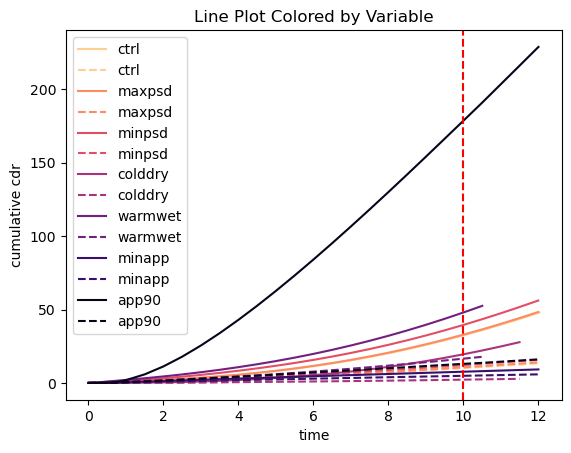

In [121]:
# --- plot CDR cumulative (lines colored by the set)
cdvar = "cdr_ton_ha_yr"  # variable to plot
cdvar_adv = "cdrAdv_ton_ha_yr"  # variable to plot

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
step = len(list(results_path.keys()))
cmap_steps = np.linspace(0.1, 0.95, step)
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
for idx in range(len(list(results_path.keys()))):
    # get df
    df_tmp = outdf[
        (outdf["set"] == "flx_gas")
        & (outdf["run_id"] == list(results_path.keys())[idx])
    ]
    # get cmap value
    this_c = cmap_steps[idx]
    # plot
    plt.plot(
        df_tmp["time"],
        df_tmp[cdvar] * df_tmp["time"],
        color=cmap(this_c),
        label=list(results_path.keys())[idx],
        linestyle="-",
    )
    plt.plot(
        df_tmp["time"],
        df_tmp[cdvar_adv] * df_tmp["time"],
        color=cmap(this_c),
        label=list(results_path.keys())[idx],
        linestyle="--",
    )

# add vert line
plt.axvline(x=10, color="red", linestyle="--")

# Add labels and title
plt.xlabel("time")
plt.ylabel("cumulative cdr")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.001, 355])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

In [124]:
# ---- print interpolated fluxes
cdvar = "cdr_ton_ha_yr"  # variable to plot
cdvar_adv = "cdrAdv_ton_ha_yr"  # variable to plot
# ---
interp_time = 1
adv_or_dif = "dif"

# loop through runs
for idx in range(len(list(results_path.keys()))):
    # get df
    df_tmp = outdf[
        (outdf["set"] == "flx_gas")
        & (outdf["run_id"] == list(results_path.keys())[idx])
    ].copy()
    df_tmp["int_cdr"] = df_tmp[cdvar] * df_tmp["time"]
    df_tmp["int_cdrAdv"] = df_tmp[cdvar_adv] * df_tmp["time"]
    # get interpolated flx
    cdr = np.interp(interp_time, df_tmp["time"], df_tmp["int_cdr"]) / interp_time
    cdrAdv = np.interp(interp_time, df_tmp["time"], df_tmp["int_cdrAdv"]) / interp_time
    # format
    cdr_f = f"{cdr:.2f}"
    cdrAdv_f = f"{cdrAdv:.2f}"
    # print result
    if adv_or_dif == "dif":
        print(
            "time = "
            + str(interp_time)
            + "; "
            + list(results_path.keys())[idx]
            + ": "
            + str(cdr_f)
        )
    if adv_or_dif == "adv":
        print(
            "time = "
            + str(interp_time)
            + "; "
            + list(results_path.keys())[idx]
            + ": "
            + str(cdrAdv_f)
        )

time = 1; ctrl: 0.81
time = 1; maxpsd: 0.66
time = 1; minpsd: 1.41
time = 1; colddry: 0.10
time = 1; warmwet: 2.03
time = 1; minapp: 0.41
time = 1; app90: 1.90


In [72]:
str(cdr, 2)

TypeError: str() argument 'encoding' must be str, not int

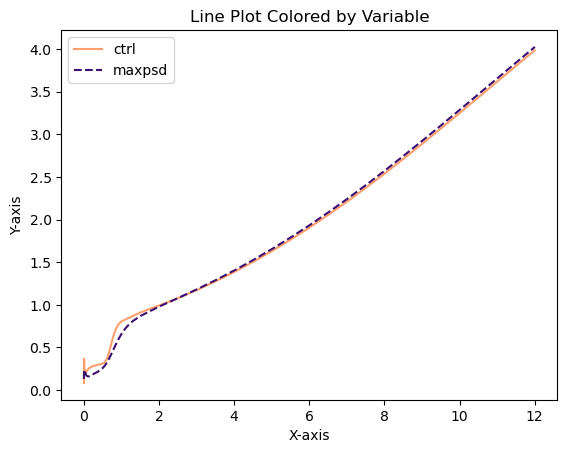

In [96]:
# --- plot CDR per year (lines colored by the set)
cdvar = "cdrAdv_ton_ha_yr"  # variable to plot
cdvar = "cdr_ton_ha_yr"

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# split into basalt and calcite continuous fluxes
dfhi_cont = outdf[
    (outdf["set"] == "flx_gas") & (outdf["run_id"] == list(results_path.keys())[0])
]
dflow_cont = outdf[
    (outdf["set"] == "flx_gas") & (outdf["run_id"] == list(results_path.keys())[1])
]
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
# split by set
plt.plot(
    dfhi_cont["time"],
    dfhi_cont[cdvar],
    color=cmap(0.2),
    label=list(results_path.keys())[0],
    linestyle="-",
)
plt.plot(
    dflow_cont["time"],
    dflow_cont[cdvar],
    color=cmap(0.8),
    label=list(results_path.keys())[1],
    linestyle="--",
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.0001, 15])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

In [23]:
step = len(list(results_path.keys()))
np.linspace(0.0, 1.0, step)
# list(range(0,1,0.2))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])